In [1]:
import numpy as np
import math
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
from pylab import rcParams

rcParams['figure.figsize'] = (15, 10)
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [3]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [4]:
class Neural_Network():
    
    def __init__(self, inputs, outputs, lear_rate, X_size, hidden_size, y_size):
        self.inputs = inputs # (59000 x 784)
        self.outputs = outputs # (59000 * 10)
        self.lear_rate = lear_rate
        
        self.X_size = X_size
        self.hidden_size = hidden_size
        self.y_size = y_size
        
        self.error_history = []
        self.epoch_list = []
        
        self.weights_1 = np.random.randint(low=0, high=1, size=(self.hidden_size, self.y_size))
        self.weights_2 = np.random.randint(low=0, high=1, size=(self.X_size, self.hidden_size))

        
        
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-1 * x))
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) 
    
    def feed_forward(self, i): 
        self.hidden = self.sigmoid(self.inputs[i].reshape(1, 784) @ self.weights_2) # 1x128
        """ There are transponations below, because softmax is applied on wrong axis,
            but when I change axis in function of softmax, I have an error """ 
        self.y_pred = self.softmax((self.hidden @ self.weights_1).T) # 1x128 @ 128x10 = 1x10 -> 10x1
        self.y_pred = (self.y_pred).T # 10x1 -> 1x10
        return self.y_pred
        
    def loss_(self, i):
        self.loss = self.outputs[i].reshape(1, 10) * self.y_pred.reshape(1, 10)
        self.loss = self.loss.sum()
        if self.loss == 0:
            self.loss = 1
        else:
            self.loss = -(np.log(self.loss))
        return self.loss
    
    def grad_to_W2(self, i): # first grad_to_W2 as we need old W1
        self.diff1 = self.y_pred - self.outputs[i].reshape(1,10) # 1x10 - 1x10 = 1x10
        self.temp1 = self.diff1 @ self.weights_1.T # 1x10 @ (128x10).T = 1x128
        self.diff2 = self.hidden * (1 - self.hidden) # 1x128
        self.temp2 = self.temp1 * self.diff2 #1x128 * 1x128 = 1x128
        self.grad_to_weights_2 = self.inputs[i].reshape(784, 1) @ self.temp2 # 784x1 @ 1x128 = 784x128
        return self.grad_to_weights_2
   
    def grad_to_W1(self, i):
        self.diff = self.y_pred - self.outputs[i].reshape(1, 10)
        self.grad_to_weights_1 = self.hidden.T @ self.diff
        return self.grad_to_weights_1
    
    def correct_W1(self):
        self.weights_1 = self.weights_1 - self.lear_rate * self.grad_to_weights_1
        return self.weights_1
    
    def correct_W2(self):
        self.weights_2 = self.weights_2 - self.lear_rate * self.grad_to_weights_2
        return self.weights_2
        
    def train(self, epochs=100):
        for epoch in range(epochs):
            self.epoch_loss = 0
            for j in range(1000):
                i = random.randrange(1,50000,1)
                x_input = self.inputs[i]
                self.feed_forward(i)
                self.loss_(i)
                self.grad_to_W2(i)
                self.grad_to_W1(i)
                self.correct_W2()
                self.correct_W1()
                self.epoch_loss += self.loss
                
            self.error_history.append(self.epoch_loss)
            self.epoch_list.append(epoch)
        
    def graph(self):
        plt.plot(self.epoch_list, self.error_history)
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()    
                             
    def predict(self, new_input):
        self.hidden_pred = self.sigmoid(new_input @ self.weights_2)
        self.y_pred_pred = self.softmax((self.hidden_pred @ self.weights_1).T)
        self.y_pred_pred = self.y_pred_pred.T
        return self.y_pred_pred    

    def accuracy(self, y_pred, new_output):
        self.accuracy = y_pred * new_output
        self.accuracy = self.accuracy.sum(axis=1)
        self.accuracy = self.accuracy.sum(axis=0)
        self.accuracy = (self.accuracy / new_output.shape[0]) * 100
        print(self.accuracy)

In [5]:
nn = Neural_Network(x_train, y_train, lear_rate=0.01, X_size=784, hidden_size=128, y_size=10)

In [6]:
nn.train()

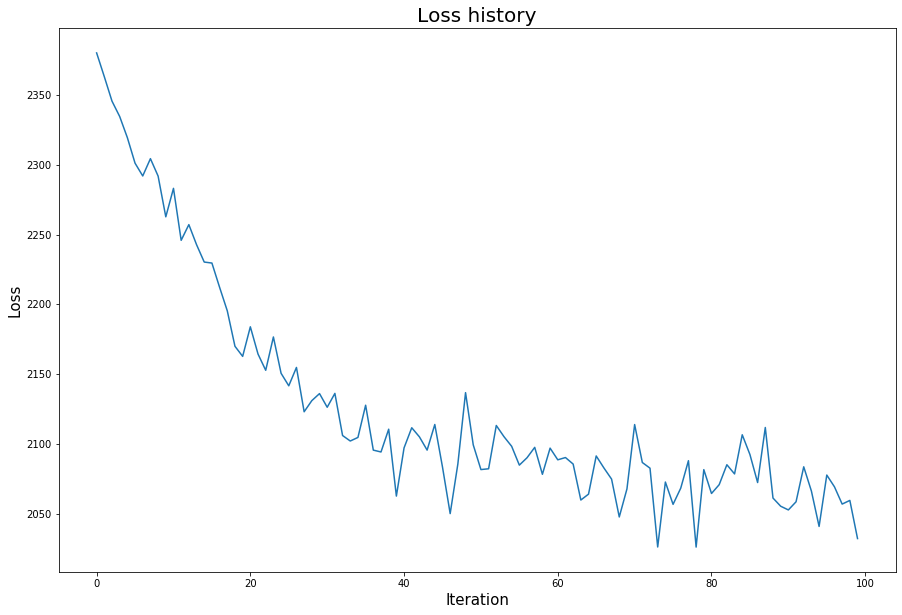

In [7]:
nn.graph()

In [8]:
y_test_pred = nn.predict(x_test)

In [9]:
nn.accuracy(y_test_pred, y_test)

18.347458614533014
